<a href="https://colab.research.google.com/github/aasthagoyal46/Kaggle/blob/master/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-optimize

     |████████████████████████████████| 81kB 2.4MB/s 


In [3]:
pip install bayesian-optimization

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from bayes_opt import BayesianOptimization
from skopt import BayesSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import files

In [0]:
train_url = "https://raw.githubusercontent.com/aasthagoyal46/Kaggle/master/train_final.csv"
test_url = "https://raw.githubusercontent.com/aasthagoyal46/Kaggle/master/test_final.csv"

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [29]:
train.shape

(16383, 26)

In [0]:
train.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,13836,142145,4673,1,128230,1,1,1,620,1


In [0]:
train.describe()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000
mean,8192.000000,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,1.041812,4.976317,1.042483,6.378380,119774.307941,0.293940,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948
std,4729.509065,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,0.258226,65.629620,0.254664,108.216528,5609.093416,1.728999,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640
min,1.000000,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,1.000000,1.000000,117880.000000,-7.446045,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,4096.500000,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,1.000000,1.000000,118232.000000,-0.704562,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,8192.000000,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,1.000000,0.000000,1.000000,1.000000,118565.000000,1.000000,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,12287.500000,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,1.000000,1.000000,1.000000,2.000000,119348.000000,1.000000,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,16383.000000,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,11.000000,5036.000000,8.000000,10076.000000,270691.000000,7.398682,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000


In [0]:
train.isnull().sum().sum()

0

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 26 columns):
Id     16383 non-null int64
Y      16383 non-null int64
f1     16383 non-null int64
f2     16383 non-null int64
f3     16383 non-null float64
f4     16383 non-null int64
f5     16383 non-null int64
f6     16383 non-null int64
f7     16383 non-null int64
f8     16383 non-null int64
f9     16383 non-null int64
f10    16383 non-null int64
f11    16383 non-null int64
f12    16383 non-null int64
f13    16383 non-null int64
f14    16383 non-null float64
f15    16383 non-null int64
f16    16383 non-null int64
f17    16383 non-null int64
f18    16383 non-null int64
f19    16383 non-null int64
f20    16383 non-null int64
f21    16383 non-null int64
f22    16383 non-null int64
f23    16383 non-null int64
f24    16383 non-null int64
dtypes: float64(2), int64(24)
memory usage: 3.2 MB


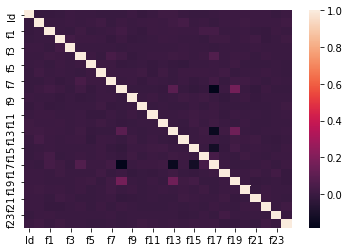

In [0]:
sns.heatmap(train.corr())

In [0]:
trainX = train.iloc[:, 2:]
trainY = train.iloc[:, 1]
testX = test.iloc[:, 1:]

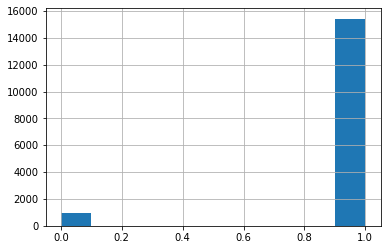

In [0]:
trainY.hist()

In [0]:
def roc_cv(model, x, y):
  roc = cross_validate(model, x, y, scoring="roc_auc", cv = 5)
  return(roc['test_score'].mean())

In [0]:
def predictResults(name, model):
  model.fit(trainX, trainY)
  pred = model.predict(testX)
  result = pd.DataFrame({"Id": test["Id"], 'Y':pred})
  result.to_csv('result'+name+'.csv', index = False)
  files.download('result'+name+'.csv')

In [0]:
def predictProb(name, model):
  model.fit(trainX, trainY)
  pred = model.predict_proba(testX)[:, 1]
  result = pd.DataFrame({"Id": test["Id"], 'Y':pred})
  result.to_csv('result'+name+'.csv', index = False)
  files.download('result'+name+'.csv')

In [0]:
lr = LogisticRegression()
print("Logistic Regression CV:", roc_cv(lr, trainX, trainY))
# predictResults("LR", lr)
predictProb("LR", lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression CV: 0.4961680268771126


In [0]:
dt = DecisionTreeClassifier()
print("Decision Tree Classifier CV:", roc_cv(dt, trainX, trainY))
# predictResults("DT", dt)
predictProb("DT", dt)

Decision Tree Classifier CV: 0.6699207201677664


In [0]:
SVM = SVC(probability = True)
print("SVC CV:", roc_cv(SVM, trainX, trainY))
# predictResults("SVC", SVM)
predictProb("SVC", SVM)

SVC CV: 0.5250014049990182


In [0]:
LDA = LinearDiscriminantAnalysis()
print("Linear Discriminent Analysis CV:", roc_cv(LDA, trainX, trainY))
# predictResults("LDA", LDA)
predictProb("LDA", LDA)

Linear Discriminent Analysis CV: 0.5388893751132682


In [0]:
QDA = QuadraticDiscriminantAnalysis()
print("Quadratic Discriminant Analysis CV:", roc_cv(QDA, trainX, trainY))
# predictResults("QDA", QDA)
predictProb("QDA", QDA)

Quadratic Discriminant Analysis CV: 0.5407467847172551


In [0]:
rf = RandomForestClassifier()
print("Random Forest CV:", roc_cv(rf, trainX, trainY))
# predictResults("RF", rf)
predictProb("RF", rf)

Random Forest CV: 0.8587284754375952


In [0]:
KNN = KNeighborsClassifier()
print("KNN CV:", roc_cv(KNN, trainX, trainY))
# predictResults("KNN", KNN)
predictProb("KNN", KNN)

KNN CV: 0.6372843655768655


In [0]:
NB = GaussianNB()
print("NB CV:", roc_cv(NB, trainX, trainY))
# predictResults("NB", NB)
predictProb("NB", NB)

NB CV: 0.56185708485301


In [0]:
XGB = XGBClassifier()
print("XGBoost CV:", roc_cv(XGB, trainX, trainY))
# predictResults("XGB", XGB)
predictProb("XGB", XGB)

XGBoost CV: 0.8442619280808291


In [0]:
def bayesTuner(estimator, search_spaces, x, y):
  bayes_cv_tuner = BayesSearchCV(
    estimator = estimator,
    search_spaces = search_spaces,    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 30,   
    verbose = 0,
    refit = True,
    random_state = 42
  )

  def status_print(optim_result):
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest Param: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_,
    ))
  
  return bayes_cv_tuner.fit(x, y, callback=status_print)

In [14]:
estimator = XGBClassifier( 
    n_jobs = 1, 
    objective = 'binary:logistic', 
    eval_metric = 'auc', 
    silent = 1, 
    tree_method = 'approx' 
)

search_spaces = { 
    'learning_rate': (0.01, 1.0, 'log-uniform'), 
    'min_child_weight': (1, 10), 
    'max_depth': (3, 50),
    # 'max_delta_step': (1, 20),
    # 'subsample': (0.01, 1.0, 'uniform'),
    'colsample_bytree': (0.01, 1.0, 'uniform'), 
    'colsample_bylevel': (0.01, 1.0, 'uniform'),
    'gamma': (1e-8, 1.0, 'log-uniform'),
    'n_estimators': (50, 800) 
}

bayes_xgb = bayesTuner(estimator, search_spaces, trainX, trainY)

Model #1
Best ROC-AUC: 0.872
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29036481584601964), ('learning_rate', 0.042815319280763466), ('max_depth', 34), ('min_child_weight', 5), ('n_estimators', 313)])

Model #2
Best ROC-AUC: 0.872
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29036481584601964), ('learning_rate', 0.042815319280763466), ('max_depth', 34), ('min_child_weight', 5), ('n_estimators', 313)])

Model #3
Best ROC-AUC: 0.872
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29036481584601964), ('learning_rate', 0.042815319280763466), ('max_depth', 34), ('min_child_weight', 5), ('n_estimators', 313)])

Model #4
Best ROC-AUC: 0.8802
Best Param: OrderedDict([('colsample_bylevel', 0.8142720284737898), ('colsample_bytree', 0.1801528457825951), ('gamma', 0.00060

In [15]:
bayes_xgb.best_params_

OrderedDict([('colsample_bylevel', 1.0),
             ('colsample_bytree', 0.36607433805568473),
             ('gamma', 0.00016955132181015818),
             ('learning_rate', 0.01),
             ('max_depth', 50),
             ('min_child_weight', 1),
             ('n_estimators', 800)])

OrderedDict([('colsample_bylevel', 1.0),
             ('colsample_bytree', 0.36607433805568473),
             ('gamma', 0.00016955132181015818),
             ('learning_rate', 0.01),
             ('max_depth', 50),
             ('min_child_weight', 1),
             ('n_estimators', 800)])

In [21]:
BayesXGB = XGBClassifier(**bayes_xgb.best_params_)
print("Bayes XGBoost CV:", roc_cv(BayesXGB, trainX, trainY))
# predictResults("XGB", XGB)

Bayes XGBoost CV: 0.9013517109911158


In [23]:
BayesXGB.fit(trainX, trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
              colsample_bynode=1, colsample_bytree=0.36607433805568473,
              gamma=0.00016955132181015818, learning_rate=0.01,
              max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
              n_estimators=800, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [0]:
predictProb("BayesXGB", BayesXGB)

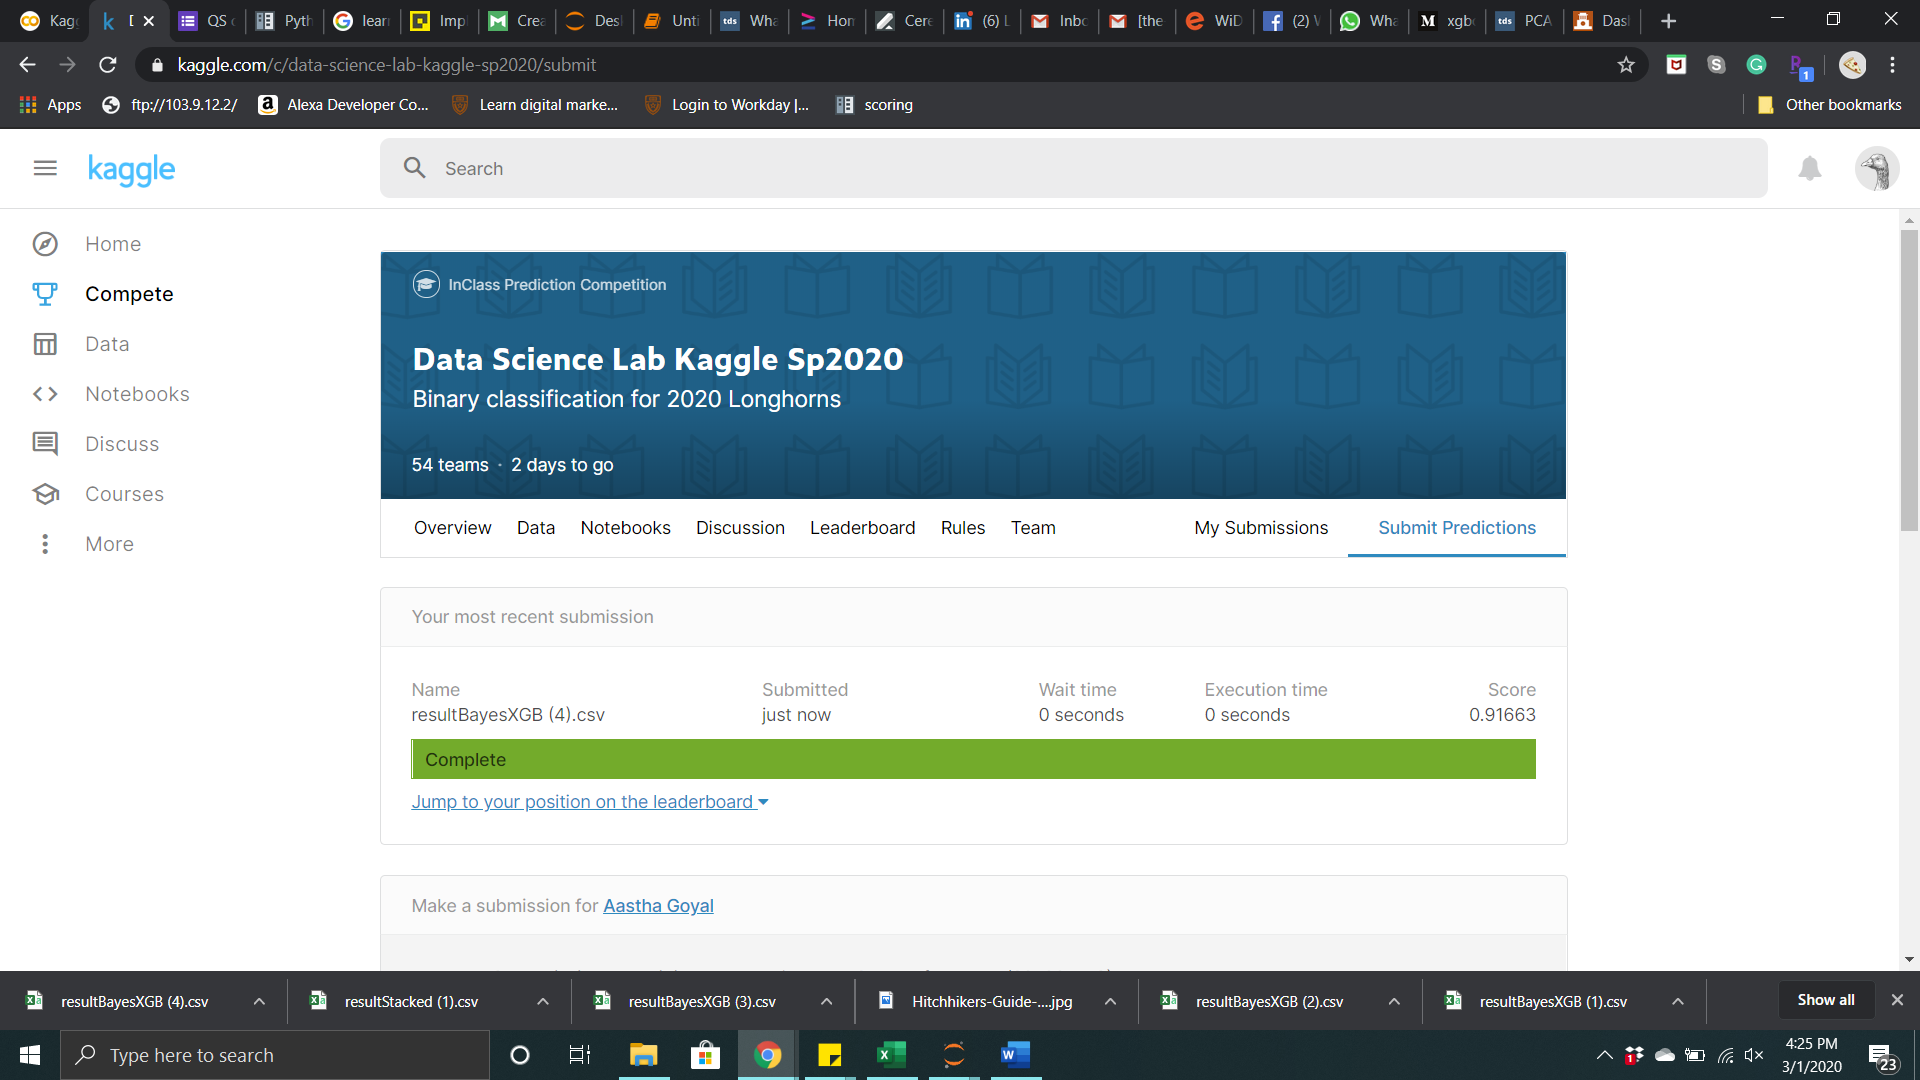

In [41]:
import lightgbm as lgb

estimator = lgb.LGBMClassifier(
      n_jobs = 1,
      objective = 'binary',
      eval_metric = 'auc',
      silent=1,
      tree_method='approx'
  )
search_spaces = {
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'min_child_weight': (1, 10),
    'max_depth': (1, 50),
    'subsample': (0.01, 1.0, 'uniform'),
    'colsample_bytree': (0.01, 1.0, 'uniform'),
    'n_estimators': (50, 200)
}

bayes_lgb = bayesTuner(estimator, search_spaces, trainX, trainY)

Model #1
Best ROC-AUC: 0.8766
Best params: OrderedDict([('colsample_bytree', 0.4160029192647807), ('learning_rate', 0.28539836866041823), ('max_depth', 47), ('min_child_weight', 4), ('n_estimators', 151), ('subsample', 0.4199774461606831)])

Model #2
Best ROC-AUC: 0.8766
Best params: OrderedDict([('colsample_bytree', 0.4160029192647807), ('learning_rate', 0.28539836866041823), ('max_depth', 47), ('min_child_weight', 4), ('n_estimators', 151), ('subsample', 0.4199774461606831)])

Model #3
Best ROC-AUC: 0.8766
Best params: OrderedDict([('colsample_bytree', 0.4160029192647807), ('learning_rate', 0.28539836866041823), ('max_depth', 47), ('min_child_weight', 4), ('n_estimators', 151), ('subsample', 0.4199774461606831)])

Model #4
Best ROC-AUC: 0.8766
Best params: OrderedDict([('colsample_bytree', 0.4160029192647807), ('learning_rate', 0.28539836866041823), ('max_depth', 47), ('min_child_weight', 4), ('n_estimators', 151), ('subsample', 0.4199774461606831)])

Model #5
Best ROC-AUC: 0.8766
Be

In [42]:
bayes_lgb.best_params_

OrderedDict([('colsample_bytree', 0.01),
             ('learning_rate', 0.40242345921951644),
             ('max_depth', 50),
             ('min_child_weight', 1),
             ('n_estimators', 200),
             ('subsample', 1.0)])

In [43]:
BayesLGB = lgb.LGBMClassifier(**bayes_lgb.best_params_)
print("Bayes Light GBM CV:", roc_cv(BayesLGB, trainX, trainY))
# predictResults("XGB", XGB)
predictProb("BayesLGB", BayesLGB)

Bayes Light GBM CV: 0.898031944129842


In [1]:
estimator = RandomForestClassifier()
search_spaces = {
    'bootstrap': [True, False],
    'max_depth': (3, 20),
    'max_features': (3,24),
    'min_samples_leaf': (1, 4),
    'min_samples_split': (1, 10),
    'n_estimators': (50, 200)
}

bayes_rf = bayesTuner(estimator, search_spaces, trainX, trainY)

NameError: ignored

In [0]:
bayes_rf.best_params_

In [0]:
BayesRF = RandomForestClassifier(**bayes_rf.best_params_)
print("Random Forest CV:", roc_cv(BayesRF, trainX, trainY))
# predictResults("RF", rf)
predictProb("BayesRF", BayesRF)

In [0]:
BayesPred = BayesXGB.predict(trainX)

stackedX = trainX[:]
stackedX['XGB'] = BayesPred

In [17]:
estimator = XGBClassifier(
    n_jobs = 1,
    objective = 'binary:logistic',
    eval_metric = 'auc',
    silent=1,
    tree_method='approx'
)

search_spaces = {
  'learning_rate': (0.01, 1.0, 'log-uniform'),
  'min_child_weight': (1, 10),
  'max_depth': (3, 50),
  'max_delta_step': (1, 20),
  'subsample': (0.01, 1.0, 'uniform'),
  'colsample_bytree': (0.01, 1.0, 'uniform'),
  'colsample_bylevel': (0.01, 1.0, 'uniform'),
  'gamma': (1e-6, 0.5, 'log-uniform'),
  'n_estimators': (100, 300)
}

bayes_stacked = bayesTuner(estimator, search_spaces, stackedX, trainY)

Model #1
Best ROC-AUC: 0.9669
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.2071985650757254), ('learning_rate', 0.042815319280763466), ('max_delta_step', 14), ('max_depth', 22), ('min_child_weight', 4), ('n_estimators', 248), ('subsample', 0.31141867792614114)])

Model #2
Best ROC-AUC: 0.9669
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.2071985650757254), ('learning_rate', 0.042815319280763466), ('max_delta_step', 14), ('max_depth', 22), ('min_child_weight', 4), ('n_estimators', 248), ('subsample', 0.31141867792614114)])

Model #3
Best ROC-AUC: 0.9669
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.2071985650757254), ('learning_rate', 0.042815319280763466), ('max_delta_step', 14), ('max_depth', 22), ('min_child_weight', 4), ('n_estimators', 248), ('subsample', 0

In [18]:
bayes_stacked.best_params_

OrderedDict([('colsample_bylevel', 0.4160029192647807),
             ('colsample_bytree', 0.7304484857455519),
             ('gamma', 0.2071985650757254),
             ('learning_rate', 0.042815319280763466),
             ('max_delta_step', 14),
             ('max_depth', 22),
             ('min_child_weight', 4),
             ('n_estimators', 248),
             ('subsample', 0.31141867792614114)])

In [20]:
BayesTestPred = BayesXGB.predict(testX)
teststackedX = testX[:]
teststackedX['XGB'] = BayesTestPred

BayesStacked = XGBClassifier(**bayes_stacked.best_params_)
print("Stacked XGB CV:", roc_cv(BayesStacked, stackedX, trainY))
# predictResults("XGB", XGB)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Stacked XGB CV: 0.9701625243326435


In [0]:
BayesStacked.fit(stackedX, trainY)
pred = BayesStacked.predict_proba(teststackedX)[:, 1]
result = pd.DataFrame({"Id": test["Id"], 'Y':pred})
result.to_csv('resultStacked.csv', index = False)
files.download('resultStacked.csv')

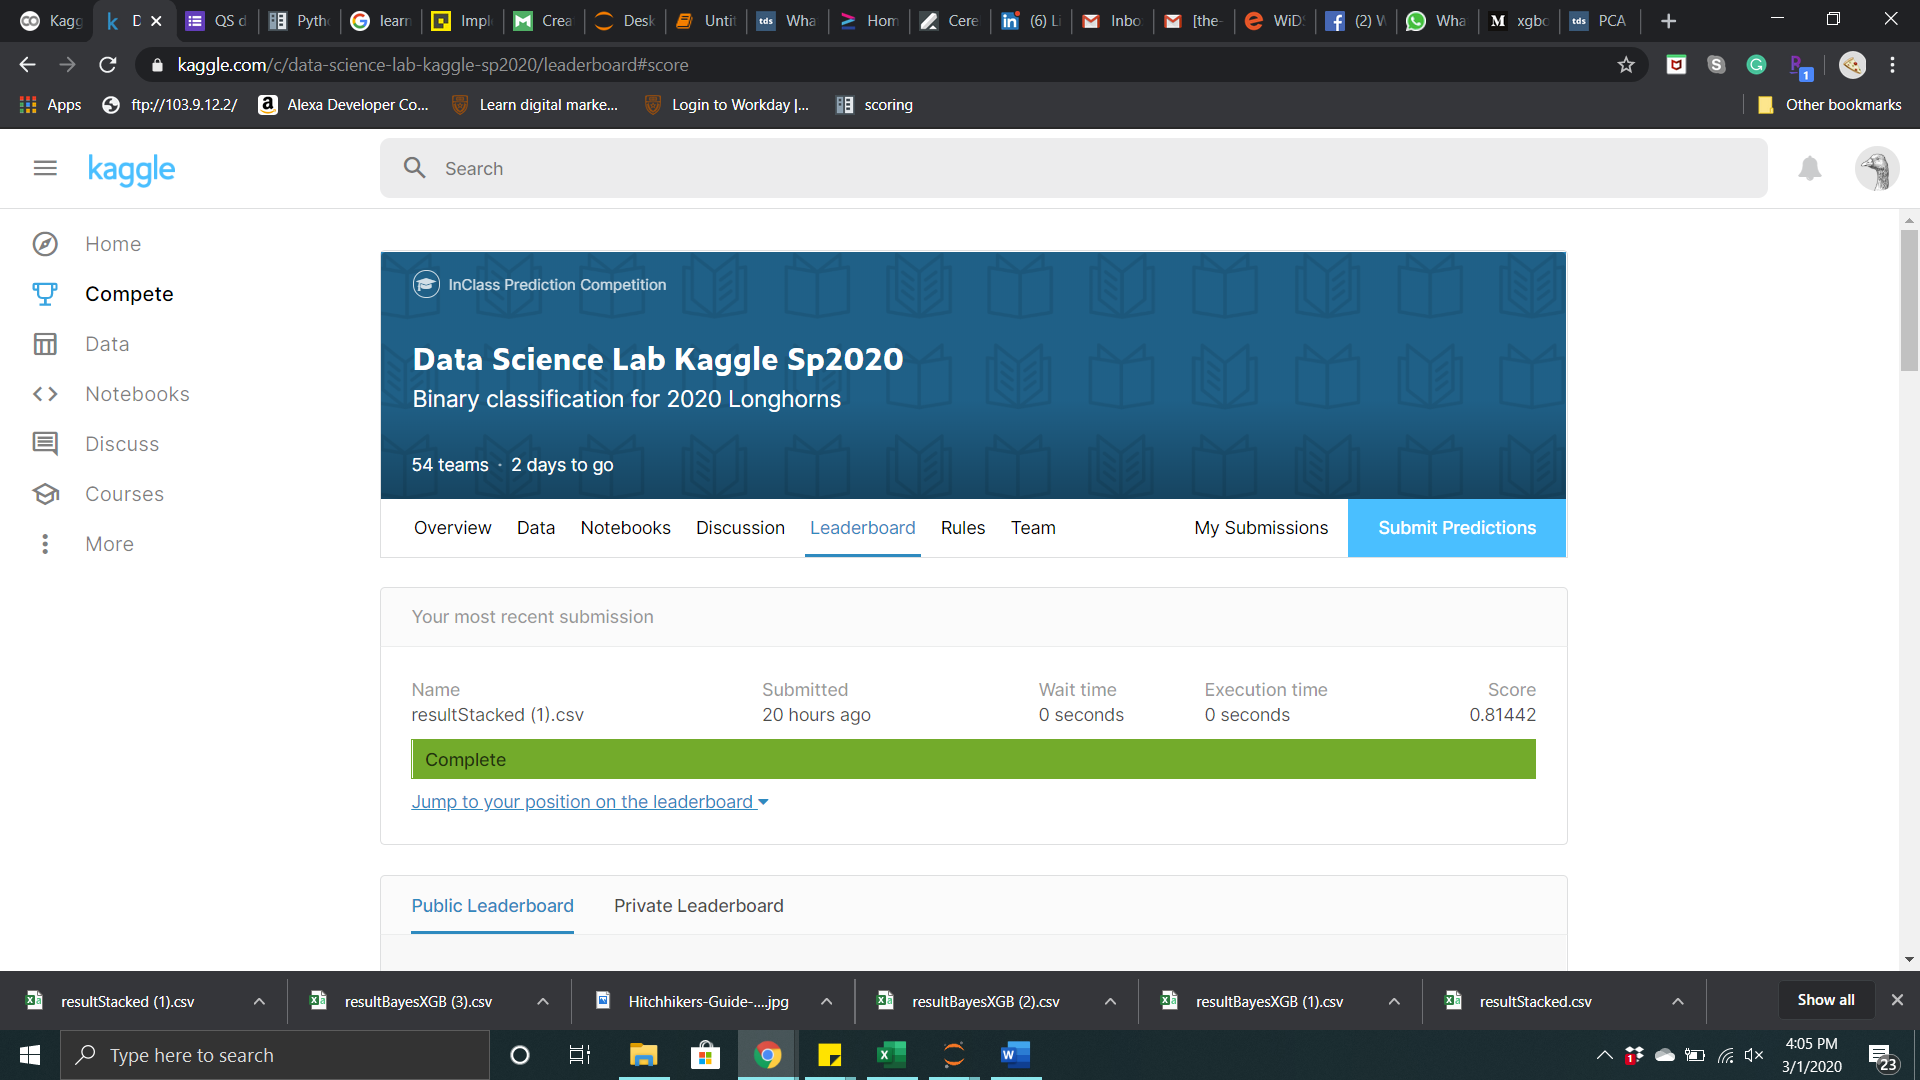

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

stdtrainX = sc.fit_transform(trainX)
stdtestX = sc.transform(testX)

In [10]:
stdtrainX

array([[-0.50948217, -0.16758185,  0.06189277, ..., -0.17005468,
        -0.01027273, -0.16927037],
       [-0.25771304, -0.16758185, -0.00325882, ..., -0.17005468,
        -0.01027304, -0.16927037],
       [-0.24054561, -0.16758185, -0.02831712, ..., -0.17005468,
        -0.01027304, -0.16927037],
       ...,
       [-0.43584372, -0.16758185, -0.02330546, ..., -0.17005468,
        -0.01027304, -0.16927037],
       [-1.05521006, -0.16758185, -0.02330546, ..., -0.17005468,
        -0.01026959, -0.16927037],
       [-0.86672537, -0.16758185, -0.02831712, ..., -0.17005468,
        -0.01027273, -0.16927037]])

In [0]:
cov_mat = np.cov(stdtrainX.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

<BarContainer object of 24 artists>

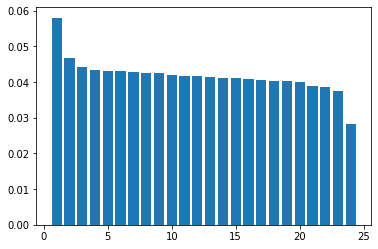

In [12]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variance
plt.bar(range(1,len(var_exp)+1), var_exp)

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
PCAtrainX = pca.fit_transform(stdtrainX)
PCAtestX = pca.transform(stdtestX)

In [23]:
estimator = XGBClassifier( 
    n_jobs = 1, 
    objective = 'binary:logistic', 
    eval_metric = 'auc', 
    silent = 1, 
    tree_method = 'approx' 
)

search_spaces = { 
    'learning_rate': (0.01, 1.0, 'log-uniform'), 
    'min_child_weight': (1, 10), 
    'max_depth': (3, 50),
    # 'max_delta_step': (1, 20),
    # 'subsample': (0.01, 1.0, 'uniform'),
    'colsample_bytree': (0.01, 1.0, 'uniform'), 
    'colsample_bylevel': (0.01, 1.0, 'uniform'),
    'gamma': (1e-8, 1.0, 'log-uniform'),
    'n_estimators': (50, 1000) 
}

bayes_xgb_pca = bayesTuner(estimator, search_spaces, PCAtrainX, trainY)

Model #1
Best ROC-AUC: 0.6845
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29036481584601964), ('learning_rate', 0.042815319280763466), ('max_depth', 34), ('min_child_weight', 5), ('n_estimators', 383)])

Model #2
Best ROC-AUC: 0.6845
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29036481584601964), ('learning_rate', 0.042815319280763466), ('max_depth', 34), ('min_child_weight', 5), ('n_estimators', 383)])

Model #3
Best ROC-AUC: 0.6845
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29036481584601964), ('learning_rate', 0.042815319280763466), ('max_depth', 34), ('min_child_weight', 5), ('n_estimators', 383)])

Model #4
Best ROC-AUC: 0.6845
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29

In [24]:
BayesXGBPCA = XGBClassifier(**bayes_xgb_pca.best_params_)
print("Stacked XGB CV:", roc_cv(BayesXGBPCA, PCAtrainX, trainY))

Stacked XGB CV: 0.696373462540922


In [0]:
BayesXGBPCA.fit(PCAtrainX, trainY)
pred = BayesXGBPCA.predict_proba(PCAtestX)[:, 1]
result = pd.DataFrame({"Id": test["Id"], 'Y':pred})
result.to_csv('resultPCA.csv', index = False)
files.download('resultPCA.csv')

In [24]:
estimator = XGBClassifier( 
    n_jobs = 1, 
    objective = 'binary:logistic', 
    eval_metric = 'auc', 
    silent = 1, 
    tree_method = 'approx' 
)

search_spaces = { 
    'learning_rate': (0.01, 1.0, 'log-uniform'), 
    'min_child_weight': (1, 10), 
    'max_depth': (3, 50),
    'colsample_bytree': (0.01, 1.0, 'uniform'), 
    'colsample_bylevel': (0.01, 1.0, 'uniform'),
    # 'reg_lambda': (1e-6, 1000, 'log-uniform'),
    'reg_alpha': (1e-6, 0.5, 'log-uniform'),
    'gamma': (1e-8, 1.0, 'log-uniform'),
    'n_estimators': (50, 400) 
}

bayes_xgb_pca = bayesTuner(estimator, search_spaces, trainX, trainY)

Model #1
Best ROC-AUC: 0.8635
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29036481584601964), ('learning_rate', 0.042815319280763466), ('max_depth', 34), ('min_child_weight', 5), ('n_estimators', 173), ('reg_alpha', 0.016383717416719377)])

Model #2
Best ROC-AUC: 0.8635
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29036481584601964), ('learning_rate', 0.042815319280763466), ('max_depth', 34), ('min_child_weight', 5), ('n_estimators', 173), ('reg_alpha', 0.016383717416719377)])

Model #3
Best ROC-AUC: 0.8635
Best Param: OrderedDict([('colsample_bylevel', 0.4160029192647807), ('colsample_bytree', 0.7304484857455519), ('gamma', 0.29036481584601964), ('learning_rate', 0.042815319280763466), ('max_depth', 34), ('min_child_weight', 5), ('n_estimators', 173), ('reg_alpha', 0.016383717416719377)])

Model #4
Best ROC-AUC: 0.8785
Best Param: O

In [25]:
BayesXGBReg = XGBClassifier(**bayes_xgb_pca.best_params_)
print("Bayes XGBoost CV:", roc_cv(BayesXGBReg, trainX, trainY))

Bayes XGBoost CV: 0.8934354224112633


In [0]:
predictProb("BayesXGBReg", BayesXGBReg)